# Reto 3 Clasificación no supervisada

### Importamos las librerías y las rutas a utilizar

In [1]:
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import joblib

# Ruta de la imagen
ruta = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica3_(Parcial)\Parte_1\imagen_filtrada.tiff'

### Leer la imagen Filtrada y Mostrarla

(11363, 25202)


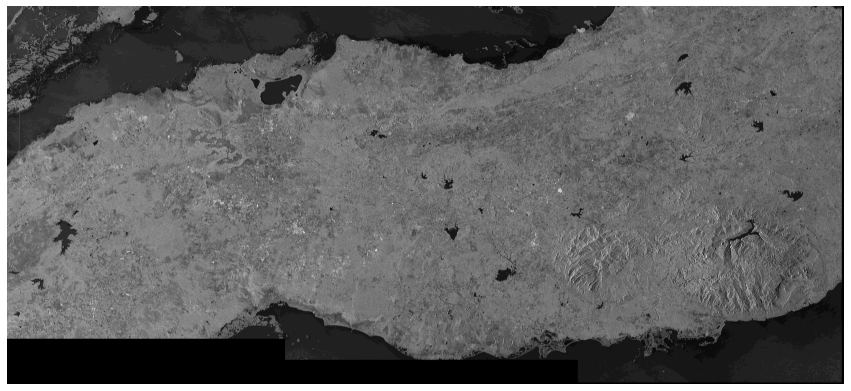

In [2]:
imagen = cv.imread(ruta,0)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(imagen, cmap='gray')
print(imagen.shape)
plt.show()

#### Reducción de la resolución de la imagen para disminuir el costo computacional Opcional para hacer pruebas de clasificacion de manera rapida si se requiere la imagen original colocar en 1 el factor_reduccion

(1136, 2520)


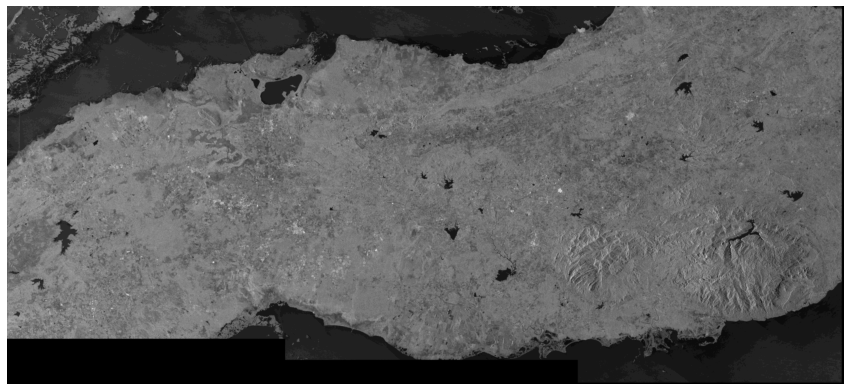

In [3]:
factor_reduccion = 0.1
imagen_reducida = cv.resize(imagen, (0, 0), fx=factor_reduccion, fy=factor_reduccion)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(imagen_reducida, cmap='gray')
print(imagen_reducida.shape)
plt.show()

### Para K-Means se requiere una imagen aplanada

In [4]:
# Se aplana la imagen
imagen_reshaped = imagen_reducida.reshape(-1, 1)
print(imagen_reshaped.shape)

(2862720, 1)


### Aplicar K-Means con 3 clusters

Centroides de cada cluster (Grises): [[ 9.10754036]
 [ 2.25169322]
 [11.57249907]]
ETIQUETAS | Vegetación = 0 | Agua = 1 | Montaña = 2 |  [0 0 0 ... 1 1 1]


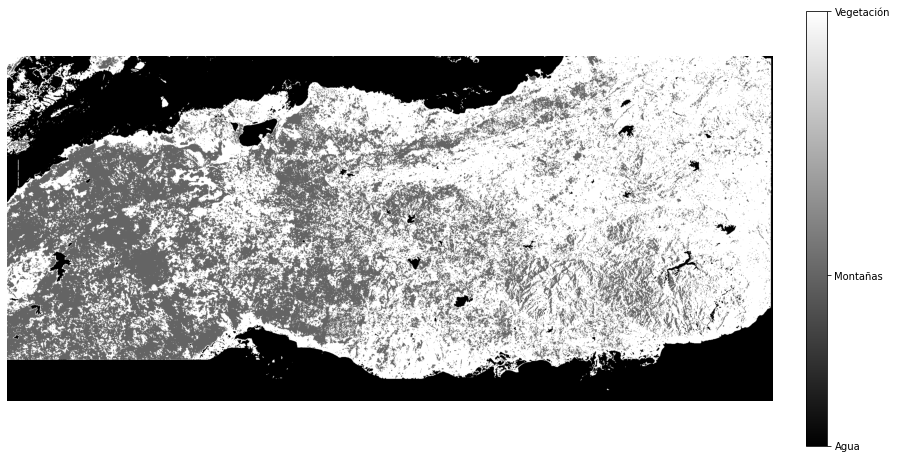

In [5]:
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(imagen_reshaped)
print('Centroides de cada cluster (Grises):', kmeans.cluster_centers_)

# Obtener las etiquetas de los clusters (asignación de cada píxel a un cluster)
etiquetas = kmeans.labels_
print('ETIQUETAS | Vegetación = 0 | Agua = 1 | Montaña = 2 | ', etiquetas)

# Convertir las etiquetas de vuelta a la forma original de la imagen (2D)
etiquetas_imagen = etiquetas.reshape(imagen_reducida.shape[:2])

# Crear una nueva imagen para visualizar los clusters en escala de grises
colores = np.zeros_like(imagen_reducida)

# Asignar niveles de gris a cada cluster según las etiquetas
# Cluster 0: Vegetación (blanco)
# Cluster 1: Agua (negro)
# Cluster 2: Montañas (gris claro)
colores[etiquetas_imagen == 0] = 255   # Vegetación (blanco)
colores[etiquetas_imagen == 1] = 0     # Agua (negro)
colores[etiquetas_imagen == 2] = 100    # Montañas (gris intermedio)

# Mostrar la imagen segmentada con los diferentes clusters
plt.figure(figsize=(15, 8))  # Ajustar el tamaño para que la imagen se vea mejor
plt.axis('off')

# Mostrar la imagen con la segmentación
img = plt.imshow(colores, cmap='gray')

# Agregar una barra de colores para visualizar los clusters
cbar = plt.colorbar(img, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_ticks([0, 100, 255])  # Ajustar los niveles de gris para la barra de color
cbar.set_ticklabels(['Agua', 'Montañas', 'Vegetación'])  # Etiquetas personalizadas
plt.show()

### Mostrar la imagen con los clusters coloreados

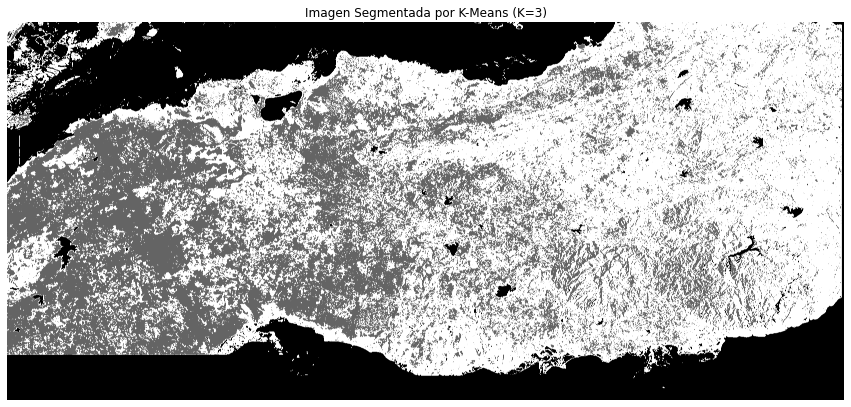

In [6]:
# Redimensionar la imagen segmentada al tamaño original
colores_reescalados = cv.resize(colores, (imagen.shape[1], imagen.shape[0]))

# Mostrar la imagen reescalada usando matplotlib
plt.figure(figsize=(15, 15))  # Tamaño de la figura ajustado para mejor visualización

# No es necesario convertir a RGB, ya que es una imagen en escala de grises
plt.imshow(colores_reescalados, cmap='gray')  # Usar cmap 'gray' para imágenes en escala de grises
plt.axis('off')  # Ocultar los ejes
plt.title('Imagen Segmentada por K-Means (K=3)')
plt.show()


# Crear una gráfica de puntos para visualizar los colores

No handles with labels found to put in legend.


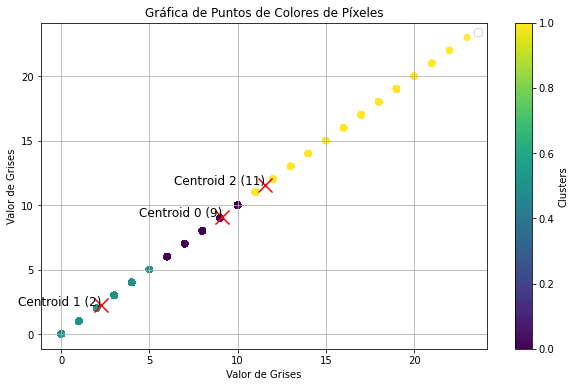

In [9]:
# Gráfico de dispersión para los clusters
plt.figure(figsize=(10, 6))
plt.scatter(imagen_reshaped, imagen_reshaped, c=etiquetas, cmap='viridis', alpha=0.5)

# Añadir los centroides al gráfico
for idx, centro in enumerate(kmeans.cluster_centers_):
    plt.scatter(centro, centro, c='red', marker='x', s=200)
    plt.text(centro, centro, f'Centroid {idx} ({int(centro[0])})', fontsize=12, ha='right', color='black')

plt.title('Gráfica de Puntos de Colores de Píxeles')
plt.xlabel('Valor de Grises')
plt.ylabel('Valor de Grises')
plt.colorbar(label='Clusters')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Guardar el modelo entrenado de K-Means
filename = 'kmeans_model.pkl'
joblib.dump(kmeans, filename)
print(f'Modelo K-Means guardado en {filename}')

# **Segmentación de Imagen con K-Means y Visualización de Resultados**

## **Descripción General**
Este programa realiza la segmentación de una imagen en escala de grises utilizando el algoritmo de clustering **K-Means**. El objetivo es dividir la imagen en diferentes regiones representadas por clusters que reflejan la intensidad de grises en áreas como vegetación, montañas y agua. Se visualizan tanto la imagen segmentada como los datos de los clusters en gráficos de dispersión y de intensidad.

---

## **Librerías Utilizadas**
- ![OpenCV](https://img.shields.io/badge/OpenCV-%23red?logo=opencv&logoColor=white) **OpenCV (`cv2`)**: Para cargar, redimensionar y procesar la imagen.
- ![Scikit-learn](https://img.shields.io/badge/scikit--learn-%23orange?logo=scikit-learn&logoColor=white) **Scikit-learn (`KMeans`)**: Para aplicar el algoritmo K-Means.
- ![Matplotlib](https://img.shields.io/badge/matplotlib-%233478a4?logo=python&logoColor=white) **Matplotlib (`plt`)**: Para visualizar la imagen original, la segmentada y los gráficos.
- **Joblib (`dump`, `load`)**: Para guardar y cargar el modelo entrenado.

---

## **Pasos Realizados**

### 1. **Cargar y Mostrar la Imagen Original**
- La imagen se carga utilizando `cv.imread()` en escala de grises.
- Redimensionamos la imagen para optimizar el procesamiento y reducir la carga computacional en K-Means.
- Mostramos la imagen original en escala de grises con `plt.imshow()`.

### 2. **Preprocesamiento de la Imagen**
- La imagen se convierte en una estructura de tamaño `(n_pixeles, 1)`, donde cada fila representa un píxel y su valor de intensidad de gris.
- Esto prepara los datos para ser ingresados en K-Means.

### 3. **Aplicación de K-Means**
- Aplicamos el algoritmo **K-Means** para agrupar los píxeles en **3 clusters**:
  - **Cluster 0**: Áreas de baja intensidad (probablemente vegetación o sombras).
  - **Cluster 1**: Áreas de intensidad intermedia (zonas con Agua).
  - **Cluster 2**: Áreas de alta intensidad (vegetación o áreas Montañosas).
- Guardamos el modelo entrenado con `joblib.dump()` para usarlo más tarde.

### 4. **Asignación de Colores a los Clusters**
- Los píxeles se colorean según su cluster y se genera la imagen segmentada.
- Reescalamos la imagen al tamaño original y la mostramos usando `plt.imshow()`.

### 5. **Visualización de Clusters en Gráficos**
- Creamos una **gráfica de dispersión** de los píxeles utilizando las intensidades de gris, donde cada punto está coloreado según su cluster.
- Generamos una **gráfica de intensidades** de gris por cluster, donde se observa que el color oscuro predomina en la imagen segmentada.

---

## **Conclusiones**
- **K-Means** segmentó la imagen en regiones según la intensidad de gris, destacando áreas como vegetación y sombras.
- Las gráficas de dispersión y de intensidades confirmaron la distribución adecuada de los clusters en la imagen.
- El modelo se guardó para su reutilización en otros análisis o imágenes.
